# Module 5: Unsupervised

In [92]:
# Setup the matplotlib styling
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import pandas as pd
import numpy as np

try:
    # Try to use the BI style sheet for plots
    line1 = (0/256, 224/256, 170/256)
    line2 = (96/256, 126/256, 229/256)
    line3 = (136/256, 76/256, 255/256)
    plt.style.use('matplotlibrc')
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[(136/256, 76/256, 255/256), (60/256, 170/256, 207/256), (12/256, 229/256, 177/256)]) 
    
    colors = [(0.53125, 0.296875, 0.99609375), (0.453125, 0.3984375, 0.9453125), (0.375, 0.4921875, 0.89453125), (0.3046875, 0.578125, 0.8515625), (0.234375, 0.6640625, 0.80859375), (0.16015625, 0.75390625, 0.76171875), (0.09375, 0.8359375, 0.72265625), (0.046875, 0.89453125, 0.69140625), (0.0, 0.875, 0.6640625)]
    bicmap = LinearSegmentedColormap.from_list(name='BIcmp', 
                                                colors=colors,
                                                N=len(colors))
    cm_bright = ListedColormap([(0.53125, 0.296875, 0.99609375), (12/256, 229/256, 177/256)])
    colors = np.array([line1, line2, line3])
except:
    bicmap = plt.cm.BuGn 
    colors = ['r', 'g', 'b']

## **Exercise 5.1: Clustering**

Apply different cluster algorithms on the data set in the data folder:  Use k-means, gaussian mixture models, hierarchical clustering and DBSCAN.

In [24]:
data = pd.read_csv('data/blobs.csv')
data.head()

,feature_1,feature_2
0,1.575309,-0.521956
1,2.867065,-0.202162
2,2.214659,-0.505485
3,2.549443,-0.963175
4,2.482846,-0.171055


Use the scatterplot function of the pandas module to visualize the results.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

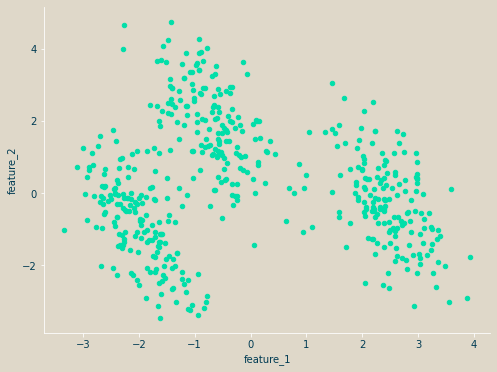

In [25]:
# Currently we are using only one color of the colors array
data.plot.scatter(x='feature_1', y='feature_2', color=colors[0])

### **Exercise 5.1.1: KMeans**

In [26]:
from sklearn.cluster import KMeans

In [27]:
# Initialize the KMeans algorithm
kmeans = KMeans(3)
# Fit the model on the data
kmeans.fit(data)

KMeans(n_clusters=3)

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

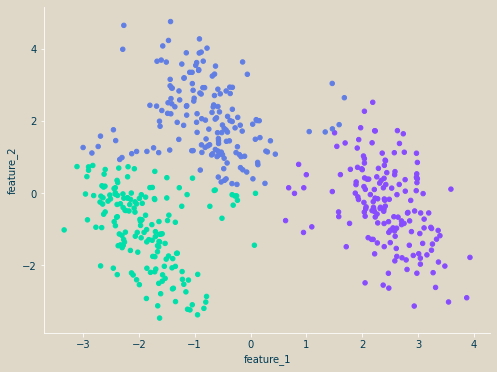

In [28]:
# Visualize the prediction of the algorithm with scatter() by passing the the predicted cluster assignment to the colors array
# Tip: colors[kmeans.predict(data)]
data.plot.scatter(x='feature_1', y='feature_2', color=colors[kmeans.predict(data)])

**How do we choose the correct number of clusters (when we have more than 3 features)**

We want to choose the number of clusters in a way that they maximize the silhouette score.

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
# Log all scores
s_score = []
# Test each number of clusters d from 2 to 20
num_clusters = list(range(2, 20+1))

for d in num_clusters:
    # Intialize a new KMeans model with n_clusters=d
    kmeans = KMeans(n_clusters=d)
    # Fit the KMeans model
    kmeans.fit(data)
    # Calculate the silhouette score with (data, kmeans.predict(data))
    score = silhouette_score(data, kmeans.predict(data))
    # append the calculated score to the list
    s_score.append(score)

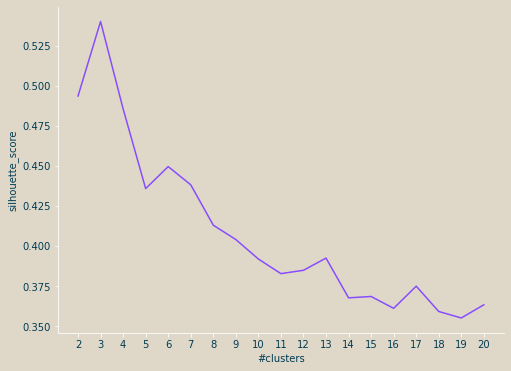

In [31]:
# Plot the result and the select the number of clusters
plt.plot(num_clusters, s_score)

plt.xlabel('#clusters')
plt.ylabel('silhouette_score')
plt.gca().set_xticks(num_clusters)
plt.gca().set_xticklabels(num_clusters)
plt.show()

**Rerun your code with the optimal number of clusters.**

### **Exercise 5.1.2: Gaussian Mixture**

In [32]:
from sklearn.mixture import GaussianMixture

In [33]:
# Intialize the GaussianMixture model with n_components=3
gm = GaussianMixture(n_components=3)
# Fit the model on the data
gm.fit(data)

GaussianMixture(n_components=3)

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

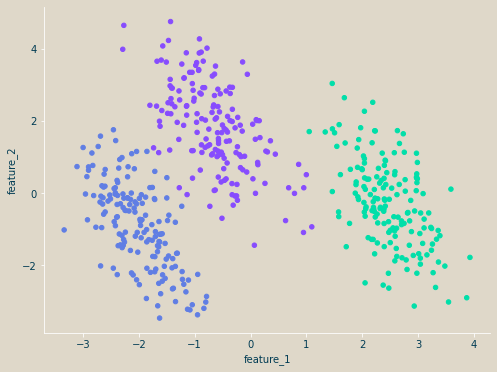

In [34]:
# Visualize the prediction as you have done before.
data.plot.scatter(x='feature_1', y='feature_2', color=colors[gm.predict(data)])

### **Exercise 5.1.3: Hierarchical Clustering**

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
from scipy.cluster.hierarchy import dendrogram

# Helper function to plot the dendogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [37]:
# Initialize the AgglomerativeClustering algorithm with distance_threshold=0, n_clusters=None
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
# Fit the clustering algorithm
model.fit(data)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

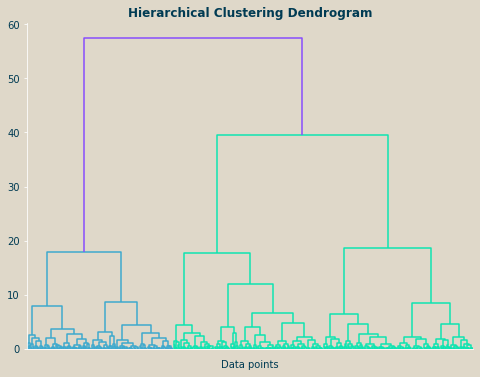

In [38]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level')
plt.xlabel("Data points")
plt.gca().set_xticklabels([])
plt.show()

**Based on the dendogram, how many clusters should you choose?**

3! Because for the three remaining clusters we have the largest distance until the next merge happens.

**Rerun the code. This time specify the number of clusters and plot the result**

In [39]:
# Initialize the AgglomerativeClustering algorithm with n_clusters=? (?=your chosen number of clusters)
model = AgglomerativeClustering(n_clusters=3)
# You don't need to fit the algorithm

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

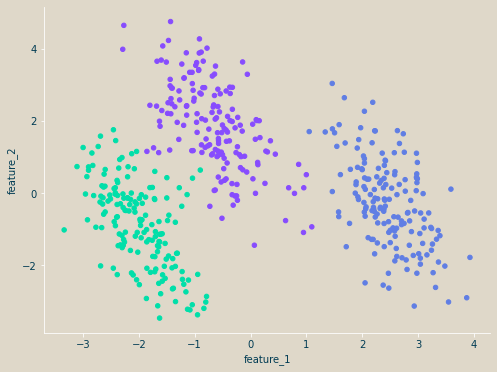

In [91]:
# Visualize the prediction as you have done before.
# This time instead of predict use fit_predict(data)
data.plot.scatter(x='feature_1', y='feature_2', color=colors[model.fit_predict(data)])

### **Exercise 5.1.4: DBSCAN**

In [80]:
from sklearn.cluster import DBSCAN

In [119]:
# Initialize dbscan
dbscan = DBSCAN(eps=0.4, min_samples=6)
# You don't need to fit the algorithm

In [101]:
# Adds a new color for outliers
extended_colors = np.append(colors, [[0, 0, 0]], axis=0)

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

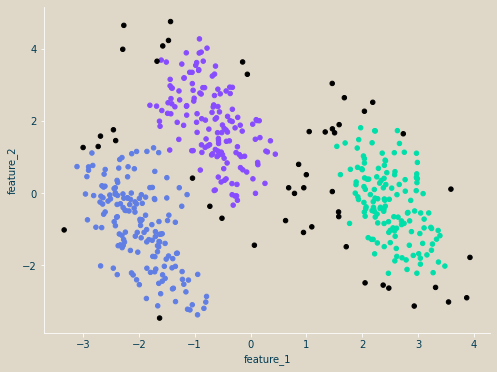

In [120]:
# Visualize the prediction as you have done before.
# This time instead of predict use fit_predict(data)
# Use extended_colors to visualize outliers
data.plot.scatter(x='feature_1', y='feature_2', color=extended_colors[dbscan.fit_predict(data)])

**Change the hyperparameters so that DBSCAN finds all three clusters, while ingoring the outliers.**

## **Exercise 5.2: Dimensionality Reduction**

Have a look at the digits dataset. What does the data set contain? Perform PCA, MDS and t-SNE on digits set and visualize result.

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()

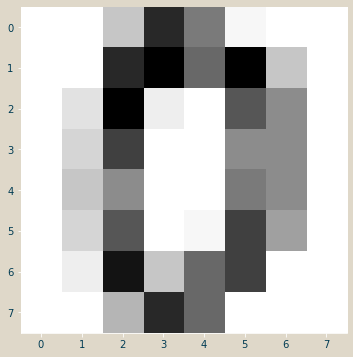

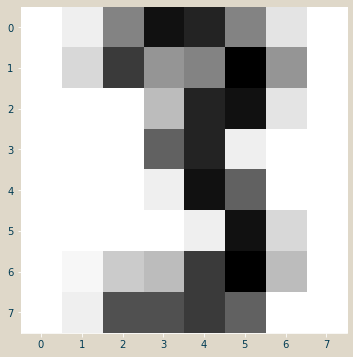

In [42]:
plt.imshow(digits["images"][0], cmap="Greys")
plt.show()

plt.figure()
plt.imshow(digits["images"][13], cmap="Greys")
plt.show()

### **Exercise 5.2.1: PCA**

In [43]:
from sklearn.decomposition import PCA

In [44]:
# Intialize PCA with n_components=2
pca = PCA(n_components=2)
# Project the digits into the two dimensional space using fit_transform(digits.data)
projected = pca.fit_transform(digits.data)

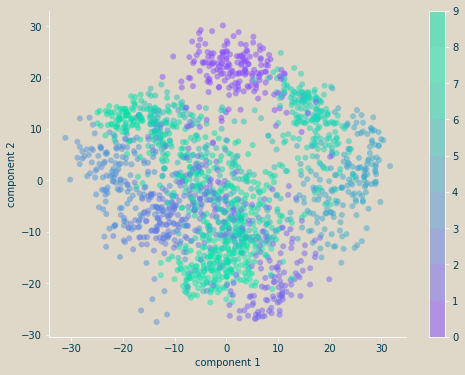

In [45]:
# Visualize the results
plt.figure()
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=bicmap)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

### **Exercise 5.2.2: MDS**

In [46]:
from sklearn.manifold import MDS

In [47]:
# Intialize mds with n_components=2
mds = MDS(n_components=2)
# Reduce the number of dimensions with fit_transform
projected = mds.fit_transform(digits.data)

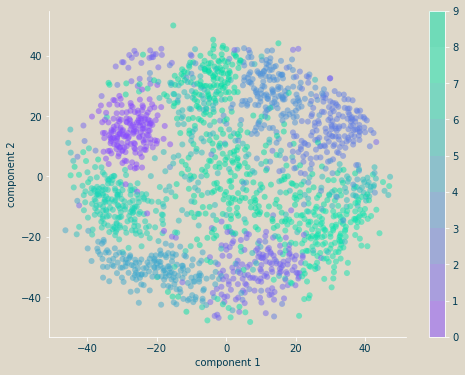

In [48]:
# Visualize the results
plt.figure()
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=bicmap)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

### **Exercise 5.2.3: t-SNE**

In [49]:
from sklearn.manifold import TSNE

In [50]:
# Initialize tsne with n_components=2
tsne = TSNE(n_components=2)
# Reduce the number of dimensions with fit_transform
projected = tsne.fit_transform(digits.data)

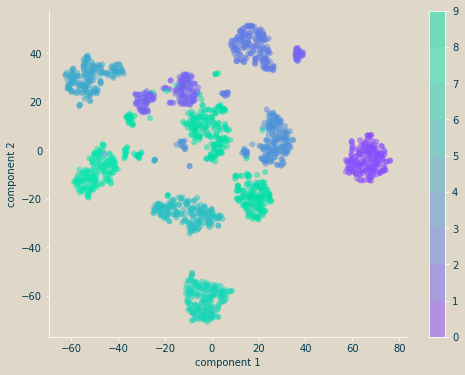

In [51]:
# Visualize the results
plt.figure()
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=bicmap)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

## **Exercise 5.3: Outlier detection**

We want to find abnormal transactions in credit card payments. For that you find data for the credit card transactions of a person in the file data/credit_card_data.csv. 

In [52]:
transactions = pd.read_csv('data/credit_card_data.csv')
transactions.head()

,AMOUNT_SPEND,DISTANCE_TO_HOME
0,34.426633,8.074255
1,26.071992,17.740461
2,23.274858,2.005336
3,32.410736,1.278150
4,35.268253,1.408649


### **Exercise 5.3.1**

Visualize the data using pandas scatter. Do you have an explanation for what you see? Which transactions do you think are outliers?

<AxesSubplot:xlabel='AMOUNT_SPEND', ylabel='DISTANCE_TO_HOME'>

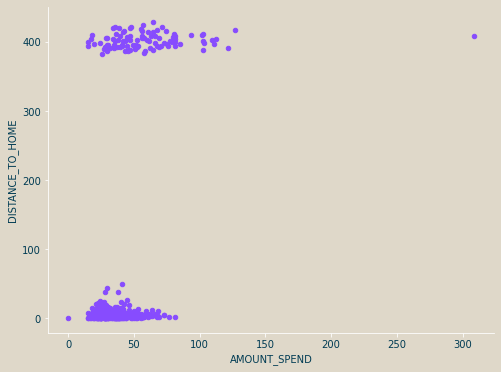

In [53]:
transactions.plot.scatter(x='AMOUNT_SPEND', y='DISTANCE_TO_HOME')

### **Exercise 5.3.2**

Find outliers using the Isolation Forest algorithm. Is the result as you would expect?

In [54]:
from sklearn.ensemble import IsolationForest

In [55]:
# Initialize an IsolationForest object
iso = IsolationForest()
# Fit the model on the data
iso.fit(transactions)

IsolationForest()

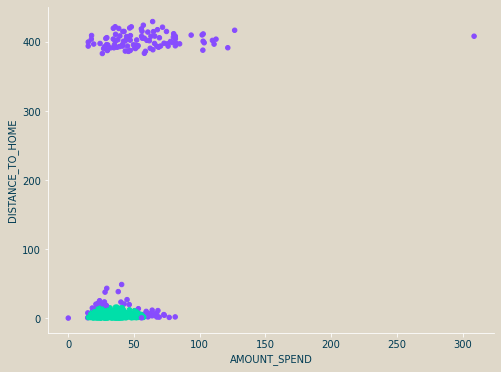

In [56]:
# Visualize the outlier score
# To visualize the probability of being an outlier from isolationforest use
# cmap=bicamp and c=isolationforest.predict(transactions)
transactions.plot.scatter(x='AMOUNT_SPEND', y='DISTANCE_TO_HOME', cmap=bicmap, c=iso.predict(transactions), colorbar=False)
plt.show()

**Is the result what you expected?**
Tip: +1 means inliner. -1 means outlier.

No, but why?

### **Exercise 5.3.3**

What could you do to handle the outliers in the two separate regions of the separately? 

Think about how you could transform the data to get a more intuitive result. Hint: The logarithm might help.

In [57]:
# Intialize the a kmeans object with (n_clusters=2)
kmeans = KMeans(n_clusters=2)
# Fit kmeans on the transactions
kmeans.fit(transactions)

KMeans(n_clusters=2)

In [73]:
# Based on the kmeans algorithm devide the data into two chunks
# Tip: You can index rows in a DataFrame with transactions[cond]
# Tip: You can create conditions by performing boolean operations on a numpy array

# Save the predicted cluster assignment of kmeans in a new variable
prediction = kmeans.predict(transactions)

# Create the condition prediction == 0 and save it in a variable
cond_0 = prediction == 0
# Index transactions with the condition and save the view on the transactions in a new variable
chunk_0 = transactions[cond_0]
# We also need to scale the transactions in this chunk with np.log()
chunk_0 = np.log(chunk_0)

# Create the condition prediction == 1 and save it in a variable
cond_1 = prediction == 1
# Index transactions with the condition and save the view on the transactions in a new variable
chunk_1 = transactions[cond_1]
# We also need to scale the transactions in this chunk with np.log()
chunk_1 = np.log(chunk_1)

In [78]:
# Fit one isolation forest on each chunk of transactions
# This time also add contamination=0.002 to the construction of the isolation forest object

# Initialize the isolationforest0
iso0 = IsolationForest(contamination=0.002)
# Fit the isolationforest0 on the first chunk
iso0.fit(chunk_0)

# Intialize the isolationforest1
iso1 = IsolationForest(contamination=0.002)
# Fit the isolationforest1 on the second chunk
iso1.fit(chunk_1)

IsolationForest(contamination=0.002)

<AxesSubplot:xlabel='AMOUNT_SPEND', ylabel='DISTANCE_TO_HOME'>

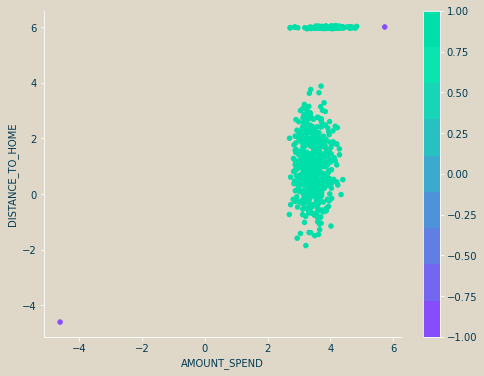

In [79]:
# Finally, visualize the results
# Tip: Use the code you used before for plotting
# Tip: To connect both plots save the ax object returend from the first .plot.scatter() and then pass it to the second .plot.scatter(ax=ax)
ax = chunk_0.plot.scatter(x='AMOUNT_SPEND', y='DISTANCE_TO_HOME', cmap=bicmap, c=iso0.predict(chunk_0), colorbar=False)
chunk_1.plot.scatter(x='AMOUNT_SPEND', y='DISTANCE_TO_HOME', cmap=bicmap, c=iso1.predict(chunk_1), colorbar=True, ax=ax)

**Do the results now make more sense?**

Yes, they do.

### **Exercise 5.3.4**

New transcations come in. They are given in the file data/credit_card_new_transactions.csv. How would you detect whether these are abnormal or not?

In [61]:
new_transactions = pd.read_csv('data/credit_card_new_transactions.csv')
new_transactions.head()

,AMOUNT_SPEND,DISTANCE_TO_HOME
0,10.25,3.25
1,25.59,1.50
2,1500.00,100.00


In [62]:
# First separate the samples into the two clusters
new_prediction = kmeans.predict(new_transactions)

# Create the condition new_prediction == 0 and save it in a variable
cond_0 = new_prediction == 0
# Index new_transactions with the condition and save the view on the new_transactions in a new variable
chunk_0 = new_transactions[cond_0]
# We also need to scale the new_transactions in this chunk with np.log
chunk_0 = np.log(chunk_0)

# Create the condition new_prediction == 1 and save it in a variable
cond_1 = new_prediction == 1
# Index new_transactions with the condition and save the view on the new_transactions in a new variable
chunk_1 = new_transactions[cond_1]
# We also need to scale the new_transactions in this chunk with np.log
chunk_1 = np.log(chunk_1)

(-4.0, 8.0)

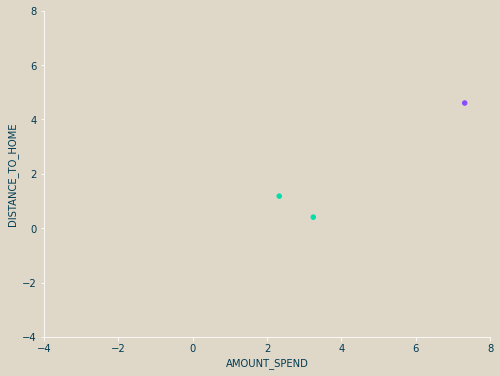

In [63]:
# Classify the samples as outliers or not
if not chunk_0.empty:
    ax = chunk_0.plot.scatter(x='AMOUNT_SPEND', y='DISTANCE_TO_HOME', cmap=bicmap, c=iso0.predict(chunk_0), colorbar=False)
if not chunk_1.empty:
    chunk_1.plot.scatter(x='AMOUNT_SPEND', y='DISTANCE_TO_HOME', cmap=bicmap, c=iso0.predict(chunk_1), colorbar=False, ax=ax)

ax.set_ylim(-4, 8)
ax.set_xlim(-4, 8)

## **Exercise 5.4: Dimensionality Reduction**

Load the cancer data set from sklearn.

In [64]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [65]:
cancer_data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_data['target'] = cancer.target
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Have a look at the data. How many samples do you have? How many features? What are the features? What is the target? Is this a classification or regression problem?

Use the function pairplot of seaborn to visualize the components Worst Texture, Worst Symmetry, Mean Concave Points and Mean radius together. What do you notice?

In [66]:
features = ['worst texture', 'worst symmetry', 'mean concave points', 'mean radius']

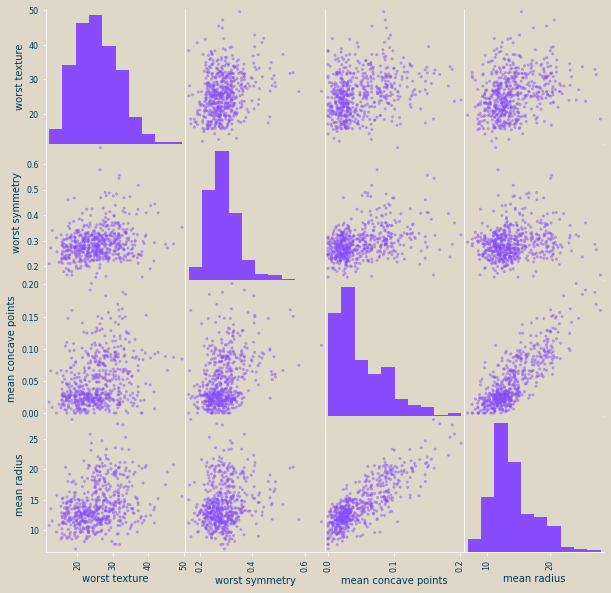

In [67]:
pd.plotting.scatter_matrix(cancer_data[features], figsize=(10, 10))
plt.show()

### **Exercise 5.4.1**

Perform a PCA on the data set. Remember: PCA needs normalization before applying it in a useful manner. Use sklearn.preprocessing.StandardScaler to normalize the data. Then perform a PCA with sklearn.decomposition.PCA and three components. Print out the explained variances.

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
tmp = StandardScaler().fit_transform(cancer_data)
pca = PCA(n_components=3).fit(tmp)
projected = pca.transform(tmp)

In [70]:
pca.explained_variance_ratio_

array([0.44896035, 0.18472104, 0.09183385])

### **Exercise 5.4.2**
Visualize the first two components together with the target. What do you notice?

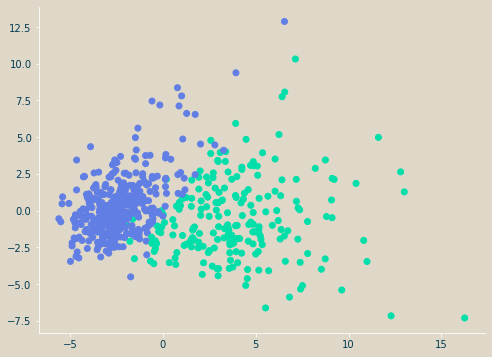

In [71]:
plt.scatter(projected[:, 0], projected[:, 1], c=colors[cancer.target])